# 1 - Exploration des données

Ce notebook permet d'explorer les données des différents datasets mis à disposition pour le projet pyPitations. Il y a 4 fichiers csv : 
- 2 fichiers (mitbih_train.csv et mitbih_test) qui sont issus de travaux menés par l'hôpital Beth Isreal Deaconess Medical Center et le MIT, qui ont créé une base de données d'éléctrocardiogramme : la MIT-BIH Arrythmia Database. Cette base contient des extraits de 30min d'ECG obtenus sur 47 patients dans les années 70s
- 2 fichiers (ptbdb_normal.csv et ptbdb_abnormal.csv) qui sont issus de la Physikalisch-Technische Bundesanstalt (Institut de Métrologie Allemande) **A COMPLETER**

Ces 4 fichiers ont subi les mêmes transformations (preprocessing) à partir des ECG bruts:
- découpage des ECG en morceaux de 10 secondes
- normalisation de la tension électrique (on obtient des valeurs entre 0 et 1)
- identification de la distance RR mediane (T) pour chaque morceaux
- découpage des morceaux en intervalles de 1.2T en comblant avec des 0 (padding) pour que chaque observation ait la même longueur

Ces fichiers possèdent 187 colonnes de données (features, allant de 0 à 186) et une colonne de classification du battement cardique : 
- les battements des fichiers issus de la MIT-BIH Arrythmia Database ont été classifiées en 4 catégories : 
    - Classe 0 : Normal (N) 
    - Classe 1 : Premature Atrial (Supraventricular) (S) **A Expliquer**
    - Classe 2 : Premature Ventricular (V) **A Expliquer**
    - Classe 3 : Fusion (F) **A Expliquer**
    - Classe 4 : Unknown (G) **A Expliquer**
- les battements des fichiers issus de la PTB ont été séparés en 2 fichiers dont les classes sont 0 (Normal) pour le fichier ptbdb_normal.csv et 1 (Abnormal) pour le fichier ptbdb_abnormal.csv. Il n'y a pas de précision des les battements non conformes de cette base de donnée par rapport à la première

## Analyse du fichier MITBIH_train

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
mit_train = pd.read_csv("../Datascientest/Data/mitbih_train.csv", header=None)

In [4]:
mit_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
mit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


Il y a donc 188 colonnes dans ce tableau mitbih_train.csv

In [6]:
mit_train.iloc[:,187].value_counts(normalize = True)*100

0.0    82.772917
4.0     7.345181
2.0     6.610777
1.0     2.539005
3.0     0.732120
Name: 187, dtype: float64

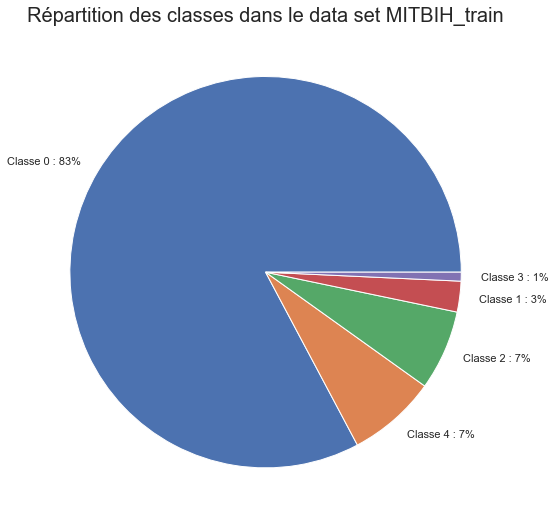

In [36]:
liste = []

for i in range(len(mit_train.iloc[:,-1].value_counts())):
    x = "Classe {} : {}%".format(round(mit_train.iloc[:,-1].value_counts(normalize = True).index[i]), round(100*mit_train.iloc[:,-1].value_counts(normalize = True).iloc[i]))
    liste.append(x)

plt.figure(figsize = (16,9))
sns.set_theme()
plt.title("Répartition des classes dans le data set MITBIH_train", fontsize = 20)
plt.pie(mit_train.iloc[:,-1].value_counts(), labels = liste);

plt.savefig("pie_mit.png")

La classe 0 est largement majoritaire vs les autres classes, nous avons donc une problématique de déséquilibrage des classes (Imbalanced classes). Nous allons maintenant observer aléatoirement des exemples de battements par classe

In [7]:
mit_train_0 = mit_train[mit_train.iloc[:,187]==0]
mit_train_1 = mit_train[mit_train.iloc[:,187]==1]
mit_train_2 = mit_train[mit_train.iloc[:,187]==2]
mit_train_3 = mit_train[mit_train.iloc[:,187]==3]
mit_train_4 = mit_train[mit_train.iloc[:,187]==4]

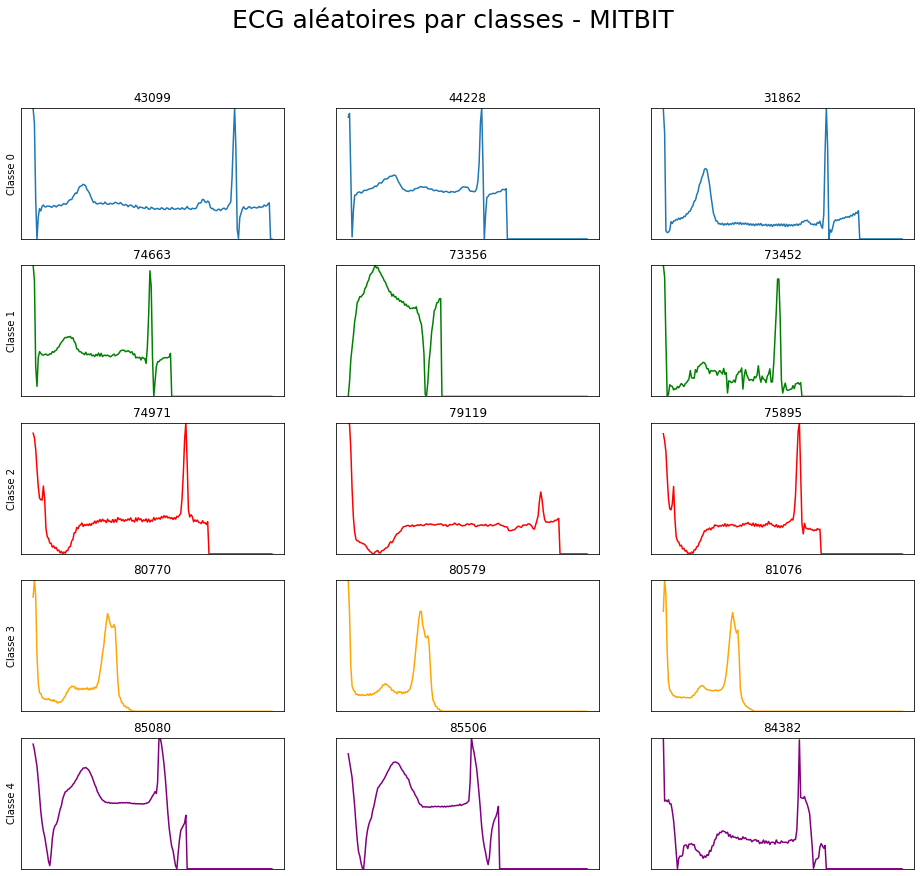

In [8]:
fig, axes = plt.subplots(5, 3, figsize = (16,14))
fig.suptitle("ECG aléatoires par classes - MITBIT", fontsize = 25)

indices = [
    [np.random.randint(0, len(mit_train_0)), np.random.randint(0, len(mit_train_0)), np.random.randint(0, len(mit_train_0))],
    [np.random.randint(0, len(mit_train_1)), np.random.randint(0, len(mit_train_1)), np.random.randint(0, len(mit_train_1))],
    [np.random.randint(0, len(mit_train_2)), np.random.randint(0, len(mit_train_2)), np.random.randint(0, len(mit_train_2))],
    [np.random.randint(0, len(mit_train_3)), np.random.randint(0, len(mit_train_3)), np.random.randint(0, len(mit_train_3))],
    [np.random.randint(0, len(mit_train_4)), np.random.randint(0, len(mit_train_4)), np.random.randint(0, len(mit_train_4))]
]

for i in range(0,5):
    for j in range(0,3):
        axes[i,j].tick_params(axis = "both", labelbottom = False, labelleft = False, length = 0)
        axes[i,j].set_ylim(0,1)
        if i == 0:    
            axes[i,j].plot(mit_train_0.iloc[indices[i][j],:-1])
            axes[i,0].set_ylabel("Classe 0")
            axes[i,j].set_title("{}".format(mit_train_0.iloc[indices[i][j]].name))

        if i == 1:
            axes[i,j].plot(mit_train_1.iloc[indices[i][j],:-1], color = "green")
            axes[i,0].set_ylabel("Classe 1")
            axes[i,j].set_title("{}".format(mit_train_1.iloc[indices[i][j]].name))
        if i == 2:
            axes[i,j].plot(mit_train_2.iloc[indices[i][j],:-1], color = "red")
            axes[i,0].set_ylabel("Classe 2")
            axes[i,j].set_title("{}".format(mit_train_2.iloc[indices[i][j]].name))
        if i == 3:
            axes[i,j].plot(mit_train_3.iloc[indices[i][j],:-1], color = "orange")
            axes[i,0].set_ylabel("Classe 3")
            axes[i,j].set_title("{}".format(mit_train_3.iloc[indices[i][j]].name))
        if i == 4:
            axes[i,j].plot(mit_train_4.iloc[indices[i][j],:-1], color = "purple")
            axes[i,0].set_ylabel("Classe 4")
            axes[i,j].set_title("{}".format(mit_train_4.iloc[indices[i][j]].name))


Observons maintenant un ECG et décomposons sa forme

''

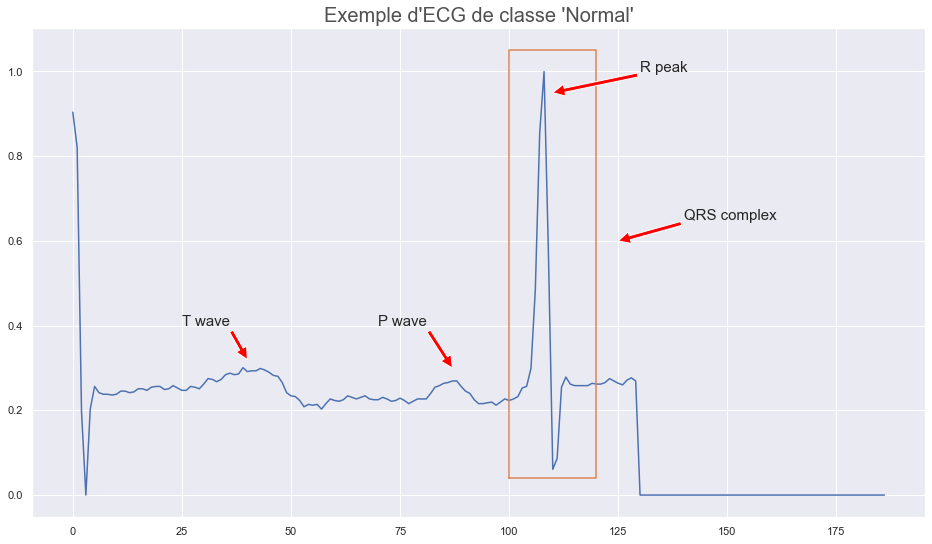

In [11]:
sns.set_theme()
fig, ax = plt.subplots(1,1,figsize = (16,9))
ax.plot(mit_train.loc[53566][:-1].index, mit_train.loc[53566][:-1])
ax.plot([100, 120, 120, 100, 100],[0.04, 0.04, 1.05, 1.05, 0.04])
ax.set_title("Exemple d'ECG de classe 'Normal'", fontsize = 20, alpha = 0.8)
ax.annotate("R peak", xy=(110, 0.95), xytext=(130, 1), arrowprops = {"facecolor": "red"}, fontsize = 15)
ax.annotate("T wave", xy=(40, 0.32), xytext=(25, 0.4), arrowprops = {"facecolor": "red"}, fontsize = 15)
ax.annotate("P wave", xy=(87, 0.3), xytext=(70, 0.4), arrowprops = {"facecolor": "red"}, fontsize = 15)
ax.annotate("QRS complex", xy=(125, 0.6), xytext=(140, 0.65), arrowprops = {"facecolor": "red"}, fontsize = 15)

plt.savefig("mit_normal.png")
;




Nous observons 3 composantes dans un battement normal:
- La vague P **à expliquer**
- Le complexe QRS **à expliquer**
- La vague T **à expliquer**

Décomposons le battement pour d'autres classes :

''

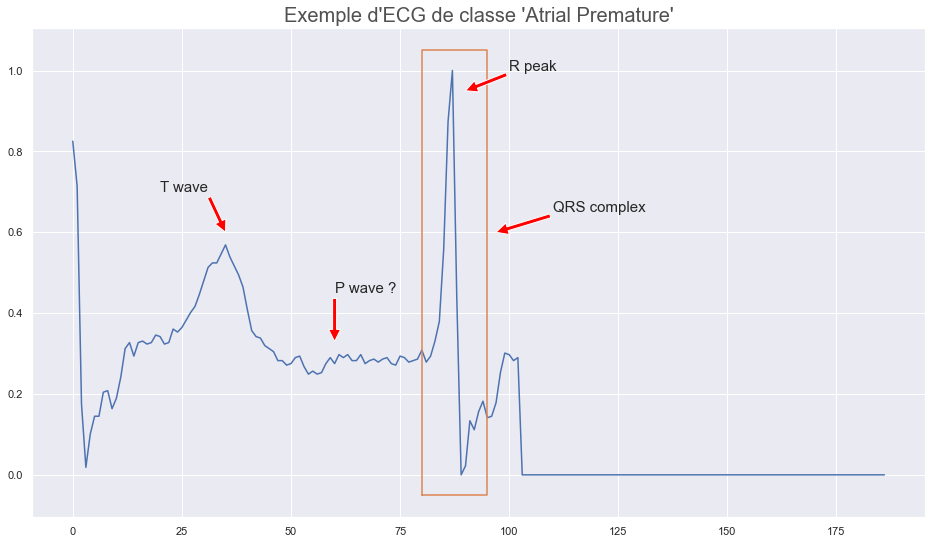

In [12]:
fig, ax = plt.subplots(1,1,figsize = (16,9))
sns.set_theme()
ax.plot(mit_train.loc[73344][:-1].index, mit_train.loc[73344][:-1])
ax.plot([80, 95, 95, 80, 80],[-0.05, -0.05, 1.05, 1.05, -0.05])
ax.set_title("Exemple d'ECG de classe 'Atrial Premature'", fontsize = 20, alpha = 0.8)
ax.annotate("R peak", xy=(90, 0.95), xytext=(100, 1), arrowprops = {"facecolor": "red"}, fontsize = 15)
ax.annotate("T wave", xy=(35, 0.6), xytext=(20, 0.7), arrowprops = {"facecolor": "red"}, fontsize = 15)
ax.annotate("P wave ?", xy=(60, 0.33), xytext=(60, 0.45), arrowprops = {"facecolor": "red"}, fontsize = 15)
ax.annotate("QRS complex", xy=(97, 0.6), xytext=(110, 0.65), arrowprops = {"facecolor": "red"}, fontsize = 15)

plt.savefig("mit_classe1.png")
;

Une des caractériqtique qu'on peut retrouver (pas systématiquement) dans les battements classés "Atrial Premature" est l'absence d'une vague P

''

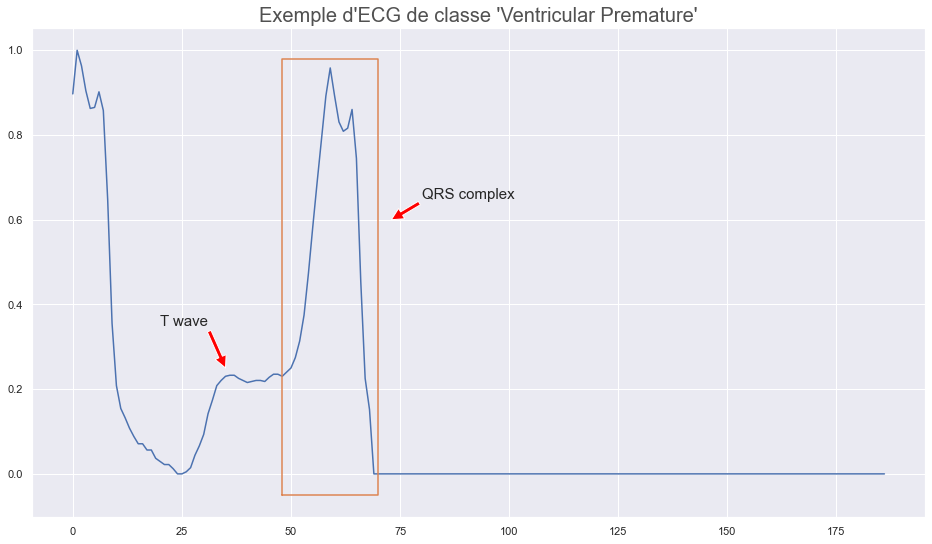

In [13]:
fig, ax = plt.subplots(1,1,figsize = (16,9))
sns.set_theme()
ax.plot(mit_train.loc[78033][:-1].index, mit_train.loc[78033][:-1])
ax.plot([48, 70, 70, 48, 48],[-0.05, -0.05, 0.98, 0.98, -0.05])
ax.set_title("Exemple d'ECG de classe 'Ventricular Premature'", fontsize = 20, alpha = 0.8)
ax.annotate("T wave", xy=(35, 0.25), xytext=(20, 0.35), arrowprops = {"facecolor": "red"}, fontsize = 15)
ax.annotate("QRS complex", xy=(73, 0.6), xytext=(80, 0.65), arrowprops = {"facecolor": "red"}, fontsize = 15)

plt.savefig("mit_classe2.png")

;

Une déformation des vagues T et du complexe QRS peuvent être une caractéristique d'un battement classé "Ventricular Premature"

## Calcul de la distance RR

Un des indicateurs qui est analysés dans le cadre des ECG est la distance RR : c'est la distance entre 2 pics. Nous allons donc calculer la distance RR de chaque observation et voir s'il y a une corrélation entre la classe et la distance RR.

**EST-CE QU'IL FAUT FAIRE UNE HYPOTHESE STATISTIQUE H0, etc...?**

''

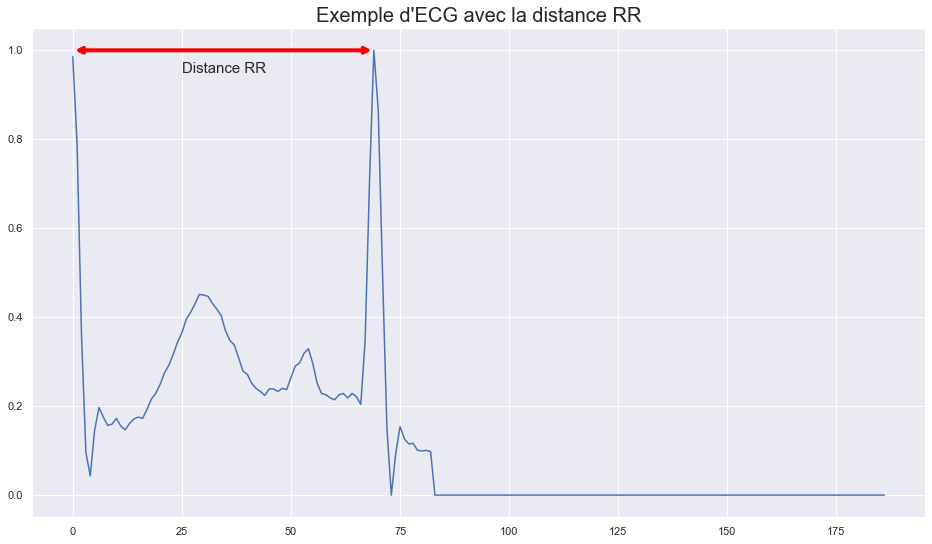

In [14]:
fig1, ax = plt.subplots(1,1,figsize=(16,9))
ax.plot(mit_train.iloc[15,:-1]);
ax.annotate("", xy = (0,1), xytext = (69, 1), arrowprops = dict(arrowstyle="<->", color = "red", linewidth = 4))
ax.text(25, 0.95, "Distance RR", fontsize = 15)
ax.set_title("Exemple d'ECG avec la distance RR", fontsize = 20)
plt.savefig("distance_RR.png")
;

In [16]:
from scipy.signal import find_peaks


In [17]:
liste_0_find_peaks = []

for i in range(len(mit_train_0)):
    a = mit_train_0.iloc[i,:-1].shift(3)
    a[0] = mit_train_0.iloc[i,3]
    a[1] = mit_train_0.iloc[i,2]
    a[2] = mit_train_0.iloc[i,1]
    a[3] = mit_train_0.iloc[i,0]
    try:
        result = find_peaks(a, height = 0.75)[0][-1] - find_peaks(a, height = 0.75)[0][0]
    except:
        result = 0
    liste_0_find_peaks.append(result)
    


In [18]:
liste_1_find_peaks = []

for i in range(len(mit_train_1)):
    a = mit_train_1.iloc[i,:-1].shift(3)
    a[0] = mit_train_1.iloc[i,3]
    a[1] = mit_train_1.iloc[i,2]
    a[2] = mit_train_1.iloc[i,1]
    a[3] = mit_train_1.iloc[i,0]
    try:
        result = find_peaks(a, height = 0.75)[0][-1] - find_peaks(a, height = 0.75)[0][0]
    except:
        result = 0
    liste_1_find_peaks.append(result)

In [19]:
liste_2_find_peaks = []

for i in range(len(mit_train_2)):
    a = mit_train_2.iloc[i,:-1].shift(3)
    a[0] = mit_train_2.iloc[i,3]
    a[1] = mit_train_2.iloc[i,2]
    a[2] = mit_train_2.iloc[i,1]
    a[3] = mit_train_2.iloc[i,0]
    try:
        result = find_peaks(a, height = 0.75)[0][-1] - find_peaks(a, height = 0.75)[0][0]
    except:
        result = 0
    liste_2_find_peaks.append(result)

In [20]:
liste_3_find_peaks = []

for i in range(len(mit_train_3)):
    a = mit_train_3.iloc[i,:-1].shift(3)
    a[0] = mit_train_3.iloc[i,3]
    a[1] = mit_train_3.iloc[i,2]
    a[2] = mit_train_3.iloc[i,1]
    a[3] = mit_train_3.iloc[i,0]
    try:
        result = find_peaks(a, height = 0.75)[0][-1] - find_peaks(a, height = 0.75)[0][0]
    except:
        result = 0
    liste_3_find_peaks.append(result)

In [21]:
liste_4_find_peaks = []

for i in range(len(mit_train_4)):
    a = mit_train_4.iloc[i,:-1].shift(3)
    a[0] = mit_train_4.iloc[i,3]
    a[1] = mit_train_4.iloc[i,2]
    a[2] = mit_train_4.iloc[i,1]
    a[3] = mit_train_4.iloc[i,0]
    try:
        result = find_peaks(a, height = 0.75)[0][-1] - find_peaks(a, height = 0.75)[0][0]
    except:
        result = 0
    liste_4_find_peaks.append(result)

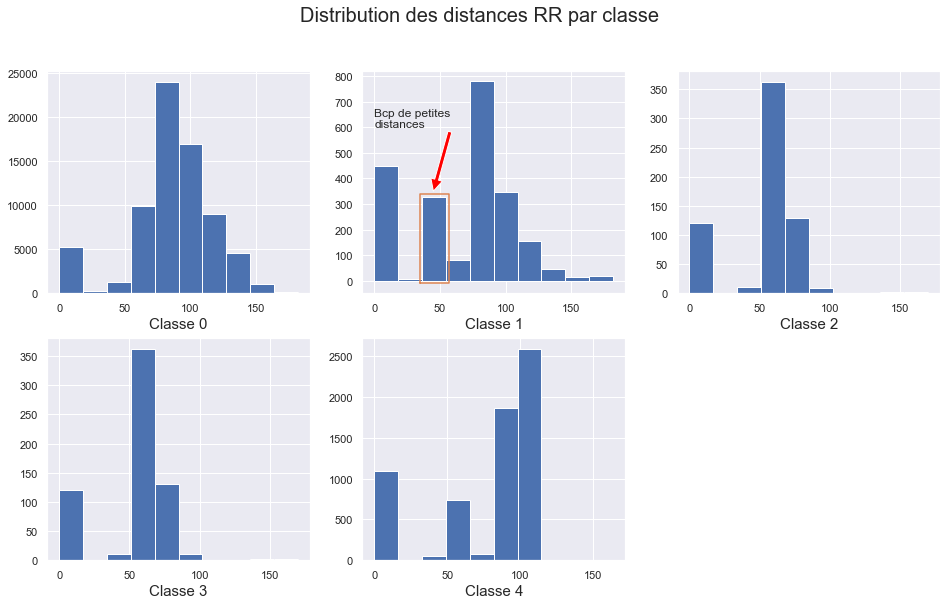

In [22]:
fig = plt.figure(figsize = (16,9))
fig.suptitle("Distribution des distances RR par classe", fontsize = 20)

ax1 = fig.add_subplot(2, 3, 1)
ax1.hist(liste_0_find_peaks)
ax1.set_xlabel("Classe 0", fontsize = 15)

ax2 = fig.add_subplot(2, 3, 2)
ax2.hist(liste_1_find_peaks)
ax2.set_xlabel("Classe 1", fontsize = 15)
ax2.plot([35, 57, 57, 35, 35], [-10, -10, 340, 340, -10])
ax2.annotate("Bcp de petites\ndistances", xy = (45, 350), xytext = (0, 600), arrowprops = {"facecolor": "red"})

ax3 = fig.add_subplot(2, 3, 3)
ax3.hist(liste_3_find_peaks)
ax3.set_xlabel("Classe 2", fontsize = 15)

ax4 = fig.add_subplot(2, 3, 4)
ax4.hist(liste_3_find_peaks)
ax4.set_xlabel("Classe 3", fontsize = 15)

ax5 = fig.add_subplot(2, 3, 5)
ax5.hist(liste_4_find_peaks)
ax5.set_xlabel("Classe 4", fontsize = 15);

plt.savefig("distrib_RR_MIT.png")

Premièrement nous pouvons observer que pour toutes les classes, nous avons des observations pour lesquelle nous ne pouvons pas calculer de distance RR, c'est également ce que l'on retrouve dans dans les exemples aléatoires observés plus haut

Ensuite nous voyons que lorsqu'on considère les observations pour lesquelles nous pouvons calculer la distance RR, la distribution des distances RR prend la forme d'une gaussienne. Pour les observations de la classe 1, toujours en retirant les observations pour lequelles on ne peut pas calculer de distance RR, on voit qu'on observe un pic au niveau de distances inférieurs à 50, que l'on ne retrouve pas dans la classe 0. On peut donc supposer **(pareil, est ce qu'il faut faire un test stat...?)** que le rythme cardiaque est plus élevé pour la classe 1 vs la classe 0. Pour les classes suivantes, on observe des distance plus courtes pour les classes 2 et 3 et plus longues pour la classe 4.

Finalement même si l'on observe des distribution non identiques, nous n'observons pas de différence caractéristique de chaque classe avec la distance RR, d'autant plus qu'il y a un nombre non négligeable d'observations pour lesquelles la distance n'est pas calculable.

Mettons maintenant en évidence les quartiles de la distance RR de chaque classe.

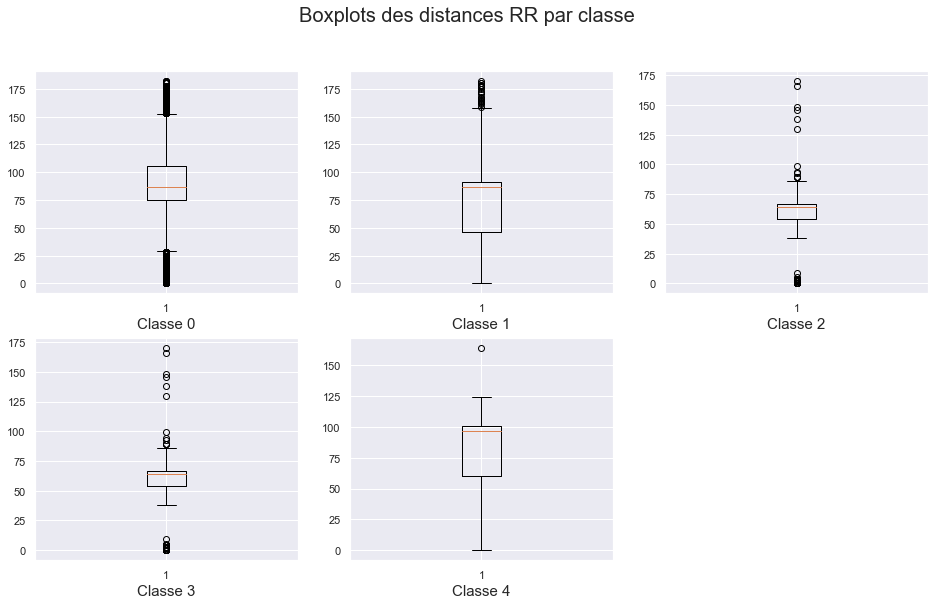

In [23]:
fig = plt.figure(figsize = (16,9))
fig.suptitle("Boxplots des distances RR par classe", fontsize = 20)

ax1 = fig.add_subplot(2, 3, 1)
ax1.boxplot(liste_0_find_peaks)
ax1.set_xlabel("Classe 0", fontsize = 15)

ax2 = fig.add_subplot(2, 3, 2)
ax2.boxplot(liste_1_find_peaks)
ax2.set_xlabel("Classe 1", fontsize = 15)

ax3 = fig.add_subplot(2, 3, 3)
ax3.boxplot(liste_3_find_peaks)
ax3.set_xlabel("Classe 2", fontsize = 15)

ax4 = fig.add_subplot(2, 3, 4)
ax4.boxplot(liste_3_find_peaks)
ax4.set_xlabel("Classe 3", fontsize = 15)

ax5 = fig.add_subplot(2, 3, 5)
ax5.boxplot(liste_4_find_peaks)
ax5.set_xlabel("Classe 4", fontsize = 15);

plt.savefig("boxplot_RR_MIT.png")

De la même manière, même si l'on observe plus ou moins de valeurs aberrantes en fonction des classes, les quartile sont plutôt proches.

Finalement, on se rend compte qu'en extrayant une caractéristique simple d'un battement cardiaque à partir des observations, nous n'arrivons pas avoir de convitions sur la classification de ces battements. Même s'il on procède de la même manière avec d'autres caractéristiques d'un battement cardiaque (forme du complexe QRS, segement PR, intervalle TP,...) pour extraire des features à rentrer dans un algorithme de classification de Machine Learning il semblerait compliqué d'avoir des résultats satisfaisants. C'est pourquoi nous devrions privilégier des algorithmes de Deep Learning, et en particulier des réseaux de neurones convolutionnels, qui sauront reconnaitre des formes caractéristiques à la manière d'une image.  

In [10]:
#En dessous : fonction construite manuellement pour calculer la distance RR, avant de trouver la fonction find_peaks. 
# Elle est donc obsolète

#def calculate_RR(row):
#    df = pd.DataFrame(row.iloc[:-1])
#    df["diff"] = df.iloc[:,0].diff(1)
#    df["diff_2"] = -df.iloc[:,0].diff(-1)
#    df["flag"] = df.apply(lambda x : 1 if (x["diff"]>0 or pd.isna(x["diff"])) & (x["diff_2"]<=0) & (x.iloc[0]>0.75) 
#                          else 0, axis=1)
#    try:
#        return df[df["flag"] == 1].index[-1] - df[df["flag"] == 1].index[0]
#    except:
#        return 0

#liste_0 = []

#for i in range(len(mit_train_0)):
#    liste_0.append(calculate_RR(mit_train_0.iloc[i,:]))

#liste_1 = []

#for i in range(len(mit_train_1)):
#    liste_1.append(calculate_RR(mit_train_1.iloc[i,:]))

#liste_2 = []

#for i in range(len(mit_train_2)):
#    liste_2.append(calculate_RR(mit_train_2.iloc[i,:]))

#liste_3 = []

#for i in range(len(mit_train_3)):
#    liste_3.append(calculate_RR(mit_train_3.iloc[i,:]))

#liste_4 = []

#for i in range(len(mit_train_4)):
#    liste_4.append(calculate_RR(mit_train_4.iloc[i,:]))

## Analyse des fichier PTBDB (normal et abnormal)

Nons allons effectuer la même analyse pour les ECG de la base de donnée PTB afin de voir si les observations sont les mêmes.

In [25]:
ptbdb_normal = pd.read_csv("../Datascientest/Data/ptbdb_normal.csv", header=None)
ptbdb_abnormal = pd.read_csv("../Datascientest/Data/ptbdb_abnormal.csv", header=None)

ptbdb = pd.concat([ptbdb_normal, ptbdb_abnormal])

In [26]:
display(ptbdb)
display(ptbdb.info())
ptbdb.iloc[:,187].value_counts()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10504,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14552 entries, 0 to 10505
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 21.0 MB


None

1.0    10506
0.0     4046
Name: 187, dtype: int64

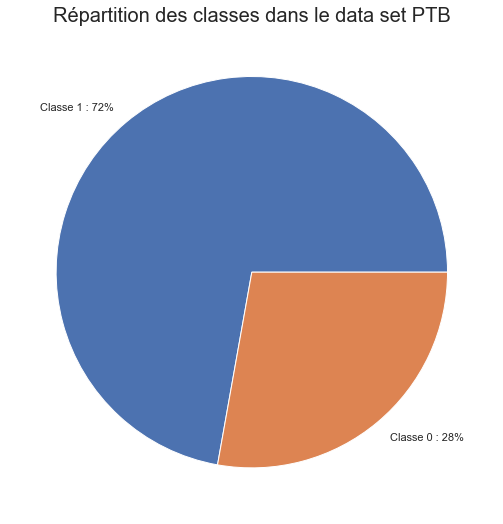

In [37]:
liste_ptb = []

for i in range(len(ptbdb.iloc[:,-1].value_counts())):
    x = "Classe {} : {}%".format(round(ptbdb.iloc[:,-1].value_counts(normalize = True).index[i]), round(100*ptbdb.iloc[:,-1].value_counts(normalize = True).iloc[i]))
    liste_ptb.append(x)

plt.figure(figsize = (16,9))
sns.set_theme()
plt.title("Répartition des classes dans le data set PTB", fontsize = 20)
plt.pie(ptbdb.iloc[:,-1].value_counts(), labels = liste_ptb);

plt.savefig("pie_ptb.png")

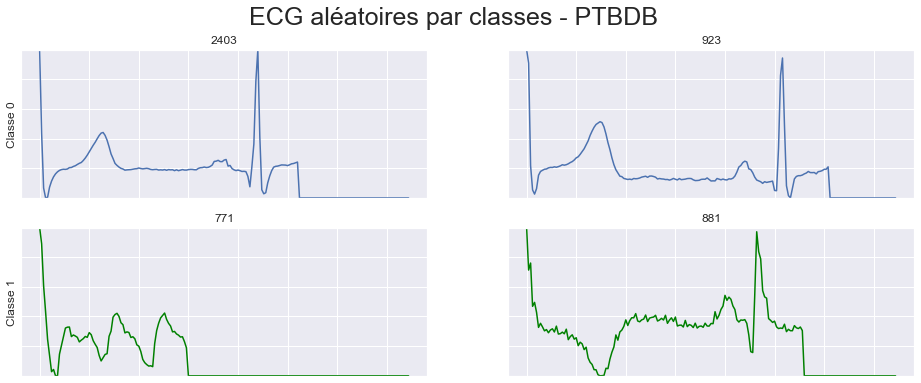

In [27]:
fig, axes = plt.subplots(2, 2, figsize = (16,6))
fig.suptitle("ECG aléatoires par classes - PTBDB", fontsize = 25)

indices = [
    [np.random.randint(0, len(ptbdb_normal)), np.random.randint(0, len(ptbdb_normal))],
    [np.random.randint(0, len(ptbdb_abnormal)), np.random.randint(0, len(ptbdb_abnormal))],
]

for i in range(0,2):
    for j in range(0,2):
        axes[i,j].tick_params(axis = "both", labelbottom = False, labelleft = False, length = 0)
        axes[i,j].set_ylim(0,1)
        if i == 0:
            axes[i,j].plot(ptbdb_normal.iloc[indices[i][j],:-1])
            axes[i,0].set_ylabel("Classe 0")
            axes[i,j].set_title("{}".format(ptbdb_normal.iloc[indices[i][j]].name))

        if i == 1:
            axes[i,j].plot(ptbdb_abnormal.iloc[indices[i][j],:-1], color = "green")
            axes[i,0].set_ylabel("Classe 1")
            axes[i,j].set_title("{}".format(ptbdb_abnormal.iloc[indices[i][j]].name))



## Calcul des distances RR

In [28]:
liste_normal_find_peaks = []

for i in range(len(ptbdb_normal)):
    a = ptbdb_normal.iloc[i,:-1].shift(3)
    a[0] = ptbdb_normal.iloc[i,3]
    a[1] = ptbdb_normal.iloc[i,2]
    a[2] = ptbdb_normal.iloc[i,1]
    a[3] = ptbdb_normal.iloc[i,0]
    try:
        result = find_peaks(a, height = 0.75)[0][-1] - find_peaks(a, height = 0.75)[0][0]
    except:
        result = 0
    liste_normal_find_peaks.append(result)

In [29]:
liste_abnormal_find_peaks = []

for i in range(len(ptbdb_abnormal)):
    a = ptbdb_abnormal.iloc[i,:-1].shift(3)
    a[0] = ptbdb_abnormal.iloc[i,3]
    a[1] = ptbdb_abnormal.iloc[i,2]
    a[2] = ptbdb_abnormal.iloc[i,1]
    a[3] = ptbdb_abnormal.iloc[i,0]
    try:
        result = find_peaks(a, height = 0.75)[0][-1] - find_peaks(a, height = 0.75)[0][0]
    except:
        result = 0
    liste_abnormal_find_peaks.append(result)

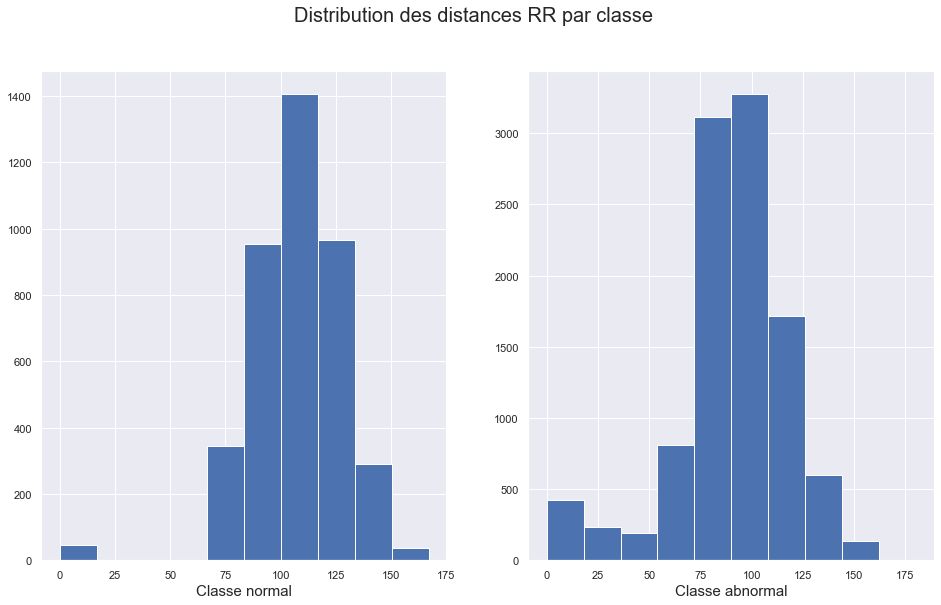

In [30]:
fig = plt.figure(figsize = (16,9))
fig.suptitle("Distribution des distances RR par classe", fontsize = 20)

ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(liste_normal_find_peaks)
ax1.set_xlabel("Classe normal", fontsize = 15)

ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(liste_abnormal_find_peaks)
ax2.set_xlabel("Classe abnormal", fontsize = 15);

plt.savefig("distrib_RR_ptb.png")

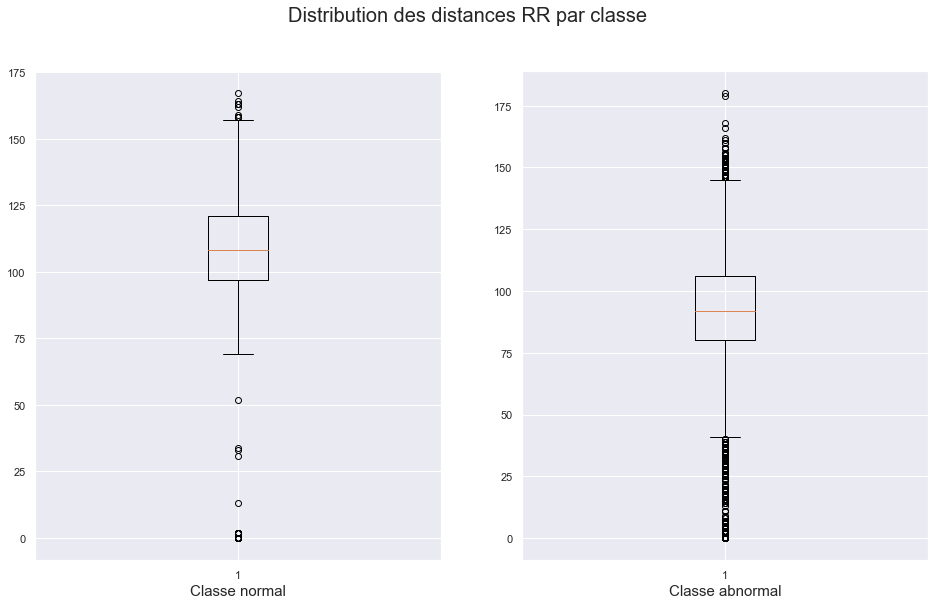

In [32]:
fig = plt.figure(figsize = (16,9))
fig.suptitle("Distribution des distances RR par classe", fontsize = 20)

ax1 = fig.add_subplot(1, 2, 1)
ax1.boxplot(liste_normal_find_peaks)
ax1.set_xlabel("Classe normal", fontsize = 15)

ax2 = fig.add_subplot(1, 2, 2)
ax2.boxplot(liste_abnormal_find_peaks)
ax2.set_xlabel("Classe abnormal", fontsize = 15);
plt.savefig("boxplot_RR_ptb.png")

Comme prévu les distributions entre les 2 classes ne sont pas significativement différentes.